In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds = pd.read_csv('diamonds.csv')
diamonds = diamonds.sample(n=800, random_state=10)

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
8018,1.01,Premium,E,SI1,61.7,56.0,4330,6.44,6.39,3.96
1583,0.70,Very Good,D,VS1,60.4,58.0,3008,5.71,5.78,3.47
9138,1.13,Very Good,H,SI2,59.8,59.0,4537,6.75,6.82,4.06
2787,0.76,Ideal,F,VS2,61.0,55.0,3257,5.89,5.92,3.60
52429,0.70,Premium,I,VVS1,61.2,59.0,2513,5.65,5.69,3.47


In [4]:
# Create a dataframe X containing all the features except cut, color, clarity, and price
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
# Create a dataframe y containing the feature price
y = diamonds[['price']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = MLPRegressor()
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [8]:
mlpModel = MLPRegressor(hidden_layer_sizes = (50, 50), activation = 'identity', max_iter = 500, random_state=123)

mlpModel.fit(X_train, np.ravel(y_train))

print("Price predictions:", mlpModel.predict(X_train[0:5]))
print("Actual prices: \n", y_train[0:5])


print("Score for the training data: ", round(mlpModel.score(X_train, y_train), 4))

print("Score for the testing data: ", round(mlpModel.score(X_test, y_test), 4))

Price predictions: [-839.87697738 1236.86893003 4122.50763011  -92.94948627 3399.12067159]
Actual prices: 
        price
8711     586
38897   1052
792     2862
31730    772
51461   2376
Score for the training data:  0.8256
Score for the testing data:  0.8246


C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
mlpModel.n_iter_

500

Text(0, 0.5, 'Loss')

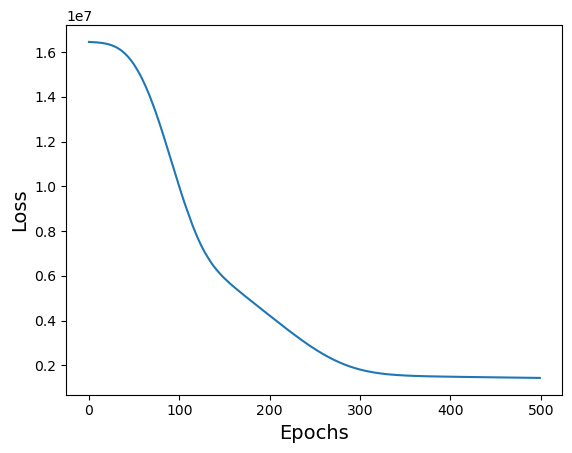

In [10]:
# Plot loss function
plt.plot(mlpModel.loss_curve_)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

In [11]:
# Change initial learning rate
mlpModel0 = MLPRegressor(random_state=123, learning_rate_init=0.0001, max_iter=500)
mlpModel0.fit(X_train, np.ravel(y_train))

mlpModel1 = MLPRegressor(random_state=123, learning_rate_init=0.001, max_iter=500)
mlpModel1.fit(X_train, np.ravel(y_train))

mlpModel2 = MLPRegressor(random_state=123, learning_rate_init=0.01, max_iter=500)
mlpModel2.fit(X_train, np.ravel(y_train))

mlpModel3 = MLPRegressor(random_state=123, learning_rate_init=0.1, max_iter=500)
mlpModel3.fit(X_train, np.ravel(y_train))

C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(learning_rate_init=0.1, max_iter=500, random_state=123)

Text(0, 0.5, 'Loss')

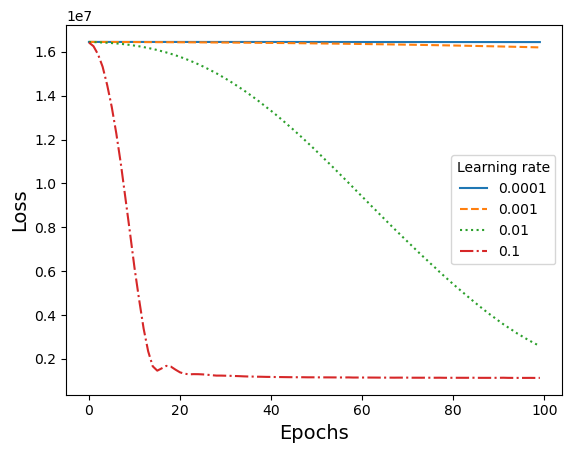

In [12]:
# Plot loss functions to compare learning rate
plt.plot(mlpModel0.loss_curve_[0:100], label='0.0001', linestyle='solid')
plt.plot(mlpModel1.loss_curve_[0:100], label='0.001', linestyle='dashed')
plt.plot(mlpModel2.loss_curve_[0:100], label='0.01', linestyle='dotted')
plt.plot(mlpModel3.loss_curve_[0:100], label='0.1', linestyle='dashdot')
plt.legend(title='Learning rate')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

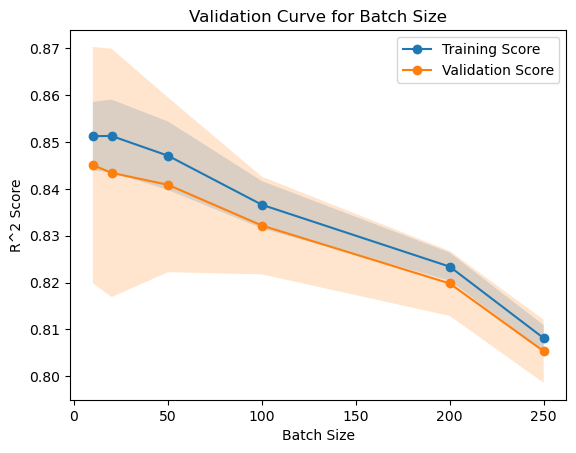

In [13]:
# Step 3: Define the range of batch sizes
batch_sizes = [10, 20, 50, 100, 200, 250]

# Step 4: Compute validation curve
train_scores, test_scores = validation_curve(
    mlpModel, X_train, np.ravel(y_train), param_name="batch_size", param_range=batch_sizes, cv=5, scoring="r2"
)

# Step 5: Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Step 6: Plot the validation curve
plt.figure()
plt.plot(batch_sizes, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(batch_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(batch_sizes, test_scores_mean, label="Validation Score", marker='o')
plt.fill_between(batch_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
plt.title("Validation Curve for Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\smontrea\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

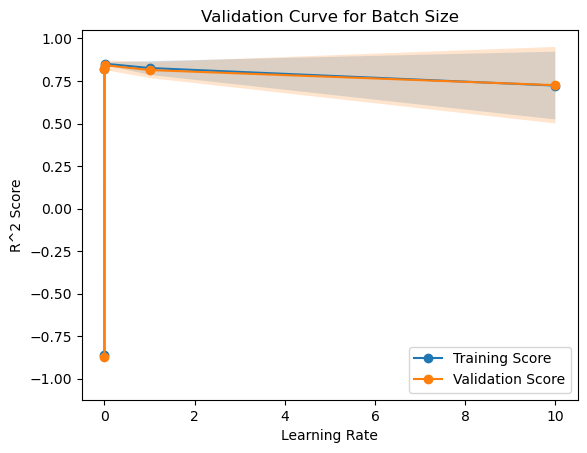

In [14]:
# Step 3: Define the range of batch sizes
learning_rate_init = [.0001, .001, .01, 1, 10]

# Step 4: Compute validation curve
train_scores, test_scores = validation_curve(
    mlpModel, X_train, np.ravel(y_train), param_name="learning_rate_init", param_range=learning_rate_init, cv=5, scoring="r2"
)

# Step 5: Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Step 6: Plot the validation curve
plt.figure()
plt.plot(learning_rate_init, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(learning_rate_init, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(learning_rate_init, test_scores_mean, label="Validation Score", marker='o')
plt.fill_between(learning_rate_init, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)
plt.title("Validation Curve for Batch Size")
plt.xlabel("Learning Rate")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()